In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
#load term stock data 
apple = yf.download('AAPL', start='2025-05-01')
apple.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-05-01,213.040634,214.279000,208.626409,208.806182,57365700
2025-05-02,205.081070,206.718922,201.895245,205.820091,101010600
2025-05-05,198.629532,203.832716,197.950430,202.834025,69018500
2025-05-06,198.250015,200.387212,196.761976,197.950420,51216500
2025-05-07,195.992981,199.178806,192.996910,198.909155,68536700


In [25]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 2025-05-01 to 2025-06-06
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   26 non-null     float64
 1   (High, AAPL)    26 non-null     float64
 2   (Low, AAPL)     26 non-null     float64
 3   (Open, AAPL)    26 non-null     float64
 4   (Volume, AAPL)  26 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1.2 KB


In [26]:
apple.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,26.000000,26.000000,26.000000,26.000000,2.600000e+01
mean,203.591754,205.610464,201.412973,203.679628,5.472317e+07
std,5.573590,5.044786,5.172429,5.191997,1.412003e+07
min,195.270004,197.699997,192.996910,193.669998,3.542330e+07
25%,200.014999,202.002506,197.560102,199.597496,4.620078e+07
50%,201.894997,204.291358,200.430000,202.955002,5.130665e+07
75%,208.299999,209.227497,204.837498,207.850002,5.875028e+07
max,213.040634,214.279000,210.580002,212.429993,1.010106e+08


In [27]:
apple.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [28]:
#check correlation on the data
apple.corr()

,Price,Close,High,Low,Open,Volume
,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Price,Ticker,,,,,
Close,AAPL,1.000000,0.971469,0.976537,0.933200,-0.131012
High,AAPL,0.971469,1.000000,0.973242,0.971848,-0.096457
Low,AAPL,0.976537,0.973242,1.000000,0.945462,-0.214900
Open,AAPL,0.933200,0.971848,0.945462,1.000000,-0.076718
Volume,AAPL,-0.131012,-0.096457,-0.214900,-0.076718,1.000000


In [60]:
# simple linear regression
#x is the previous day low and maybe other features to make it awesome
# y-is the target price('Close')

X = apple['Low'].values
Y = apple['Close'].values

In [61]:
# split the variable data so as to work with effectively
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

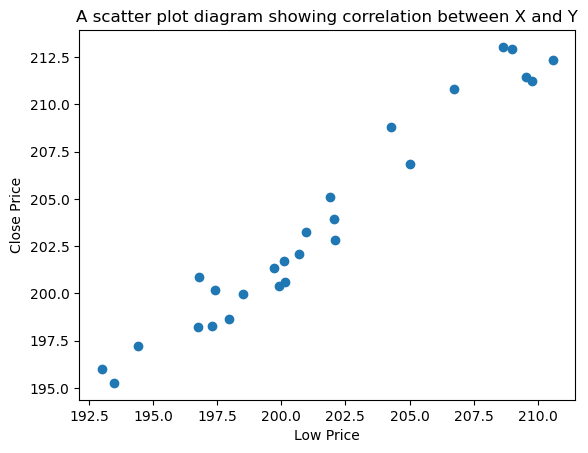

In [62]:
plt.scatter(X, Y)
plt.title("A scatter plot diagram showing correlation between X and Y")
plt.xlabel("Low Price")
plt.ylabel("Close Price")
plt.show()

In [63]:
# train the model based on split data
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [64]:
# make predictions from the trained data
predictions = model.predict(X_test)

In [65]:
evaluation = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

In [66]:
print("Mean squared error is: ", evaluation)
print("Coefficient of determination: ", r2)

Mean squared error is:  1.7617204594664753
Coefficient of determination:  0.9640934426052191


In [81]:
X.shape


(26, 1)

In [82]:
Y.shape

(26, 1)

In [83]:
# convert the 2D to 1D
X = X.ravel()
Y = Y.ravel()

In [86]:
# Y.shape

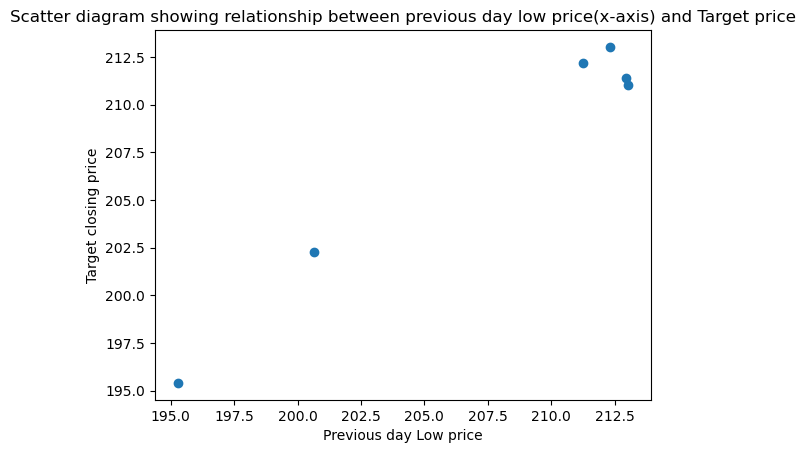

In [96]:
#plot a scatter diagram to show relationship between the y_test and predictions made from the trained model
plt.scatter(X, predictions)
plt.title("Scatter diagram showing relationship between previous day low price(x-axis) and Target price")
plt.xlabel("Previous day Low price")
plt.ylabel("Target closing price")
plt.show()


In [89]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(X, Y)
print(r)

0.9765372493774778


In [93]:
#new X = Y_test
X = Y_test

def f(X):
    return slope * X + intercept

mymodel = list(map(f, X)) #pass each value of X to the function f(X)


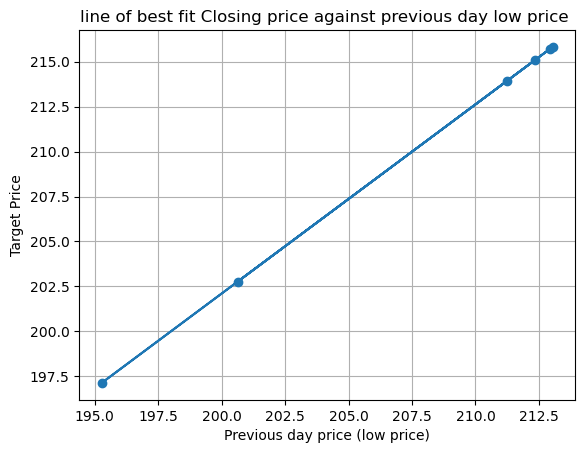

In [97]:
plt.plot(X, mymodel, marker='o')
plt.title("line of best fit Closing price against previous day low price ")
plt.xlabel("Previous day price (low price)")
plt.ylabel("Target Price")
plt.grid(True)
plt.show()

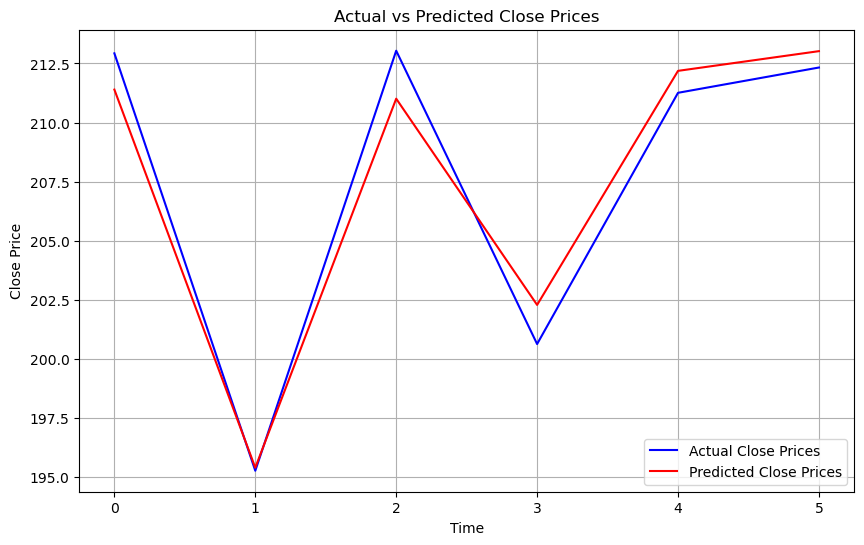

In [99]:
# Plotting Actual vs Predicted Close Prices
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label='Actual Close Prices', color='blue')
plt.plot(predictions, label='Predicted Close Prices', color='red')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#sample prediction based on the trained data
#f(X) -> function that displays prediction Closing price knowing the actual price X->passed is the actual low price of the previous day
sample = f(200)
#expected to return almost 200 from the actual closing price
print(sample)